In [106]:
# import pandas as pd
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as plt
import matplotlib.dates as mdates
import csv
from ggplot import *
import numpy
import crossref.restful as cr
works = cr.Works()
member = cr.Members()
works.count()
%matplotlib inline

SSLError: HTTPSConnectionPool(host='api.crossref.org', port=443): Max retries exceeded with url: /works?rows=0 (Caused by SSLError(SSLError("bad handshake: SysCallError(54, 'ECONNRESET')",),))

In [99]:
#Gather tax and congestion pricing themed publication counts by date
t = works.query(title=('Congestion Pricing' or 'GNSS Road Pricing' or ('Pigou' and 'Traffic'))).facet('published')

SSLError: HTTPSConnectionPool(host='api.crossref.org', port=443): Max retries exceeded with url: /works?query.title=Congestion+Pricing&rows=0&facet=published%3A100 (Caused by SSLError(SSLError("bad handshake: SysCallError(54, 'ECONNRESET')",),))

In [107]:
#Organize Publication Count
published = [[key, t['published']['values'][key]] for key in t['published']['values'].keys()]

#Place within Pandas Data Frame
x = pd.DataFrame(published)

#Organize by year
x.columns = ['Year', 'Publications']
x['Year'] = pd.to_datetime(x['Year'])
x['Year'] = x['Year'].dt.year

#Shift to descending dates
x = x.sort_index(ascending  = False)

KeyError: 'published'

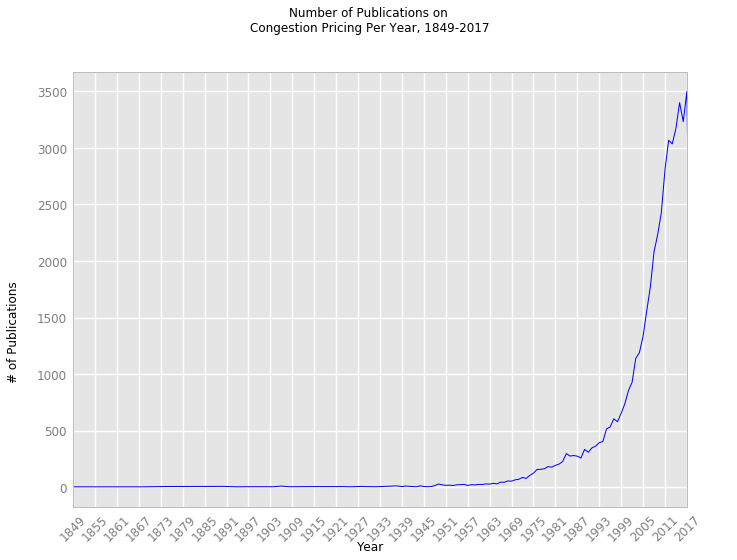

<ggplot: (-9223372029298451175)>

In [101]:
#Plot Cursory Data—Data later switched to R for cleaner output

ggplot(x, aes(x= ('Year'), y= ('Publications'))) + \
    geom_line(color = 'blue') + \
    scale_x_continuous('Year', limits = ('1849', '2017'), breaks = [1849, 1855, 1861, 1867, 1873, 1879, 1885, 1891, 1897, 1903, 1909,
       1915, 1921, 1927, 1933, 1939, 1945, 1951, 1957, 1963, 1969, 1975,
       1981, 1987, 1993, 1999, 2005, 2011, 2017]) + \
    xlim(1849, 2017) + \
    ylab('# of Publications') + \
    labs(title = "Number of Publications on \nCongestion Pricing Per Year, 1849-2017") + \
    theme(axis_text_x = element_text(angle = 45))

In [105]:
#Saved Data
x.to_csv('congestion.csv')

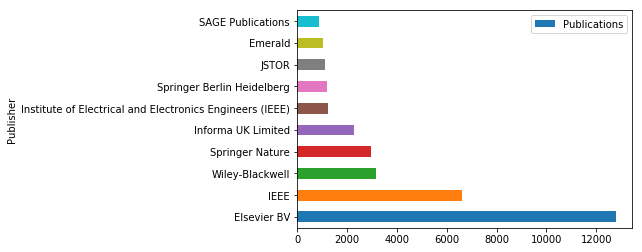

In [10]:
#Who's Publishing?
t = works.query(title=('Congestion Pricing' or 'GNSS Road Pricing' or ('Pigou' and 'Traffic'))).facet('publisher-name',10)
congestion = [[key,t['publisher-name']['values'][key]] for key in t['publisher-name']['values'].keys()]
df = pd.DataFrame(congestion)

#Plot Who's Publishing
df.columns = ['Publisher', 'Publications']
df.plot.barh(x='Publisher',y='Publications')